<a href="https://colab.research.google.com/github/dzakialthalsy/Machine_Learning_Dicoding/blob/main/Modul_3_Unsupervised_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [ ]:
import pandas as pd # untuk manipulasi dan analisis data
import matplotlib.pyplot as plt # untuk visualisasi gr afik
from yellowbrick.cluster import KElbowVisualizer # untuk visualisasi method lbow

from sklearn.cluster import KMeans, DBSCAN # mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score # mengimpor metrik Silhouette Score untuk mengevaluasi hasil clustering


# Data Preprocessing

### Data Loading

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/ML%20Pemula/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info() # menampilkan informasi mengenai jumlah baris dan kolom

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# EDA

### Gender Distribution

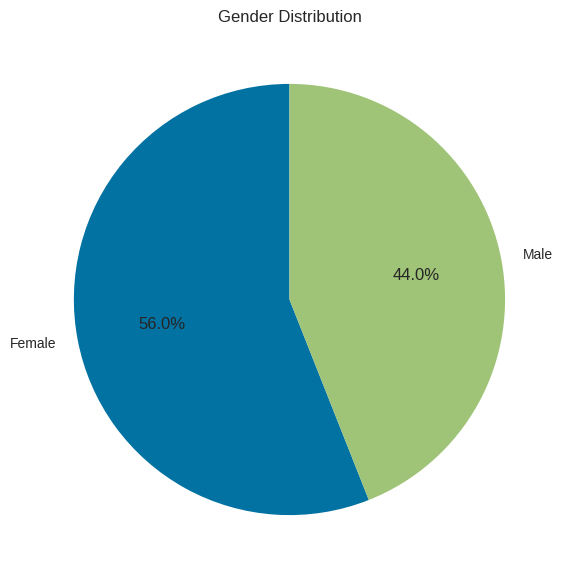

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

### Customer Age Distribution (Binning Method)

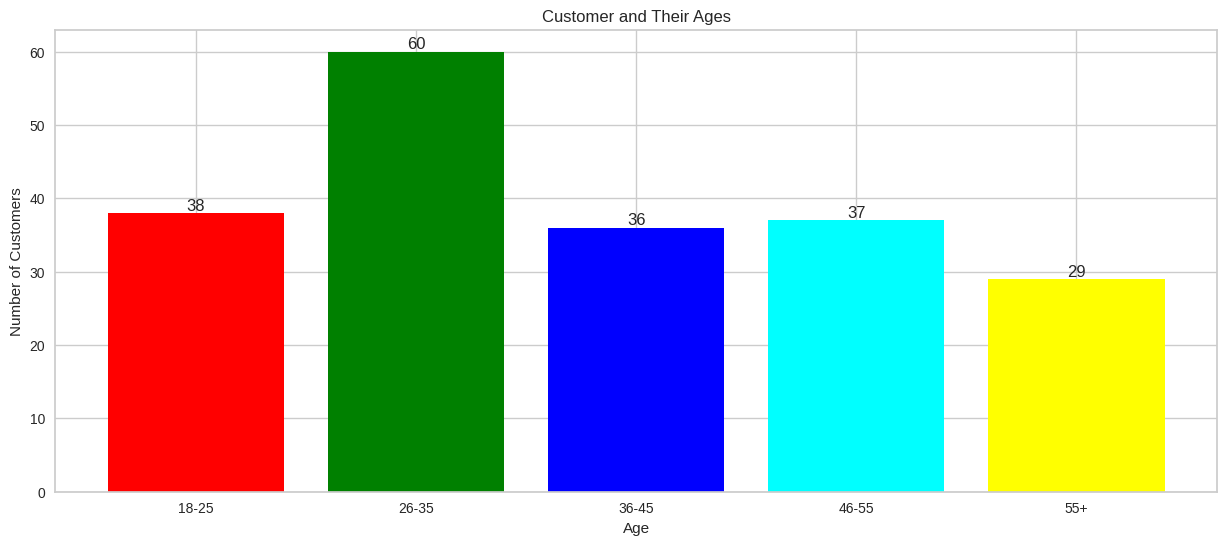

In [ ]:
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title('Customer and Their Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customers')

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

### Annual Income of Customer Distribution

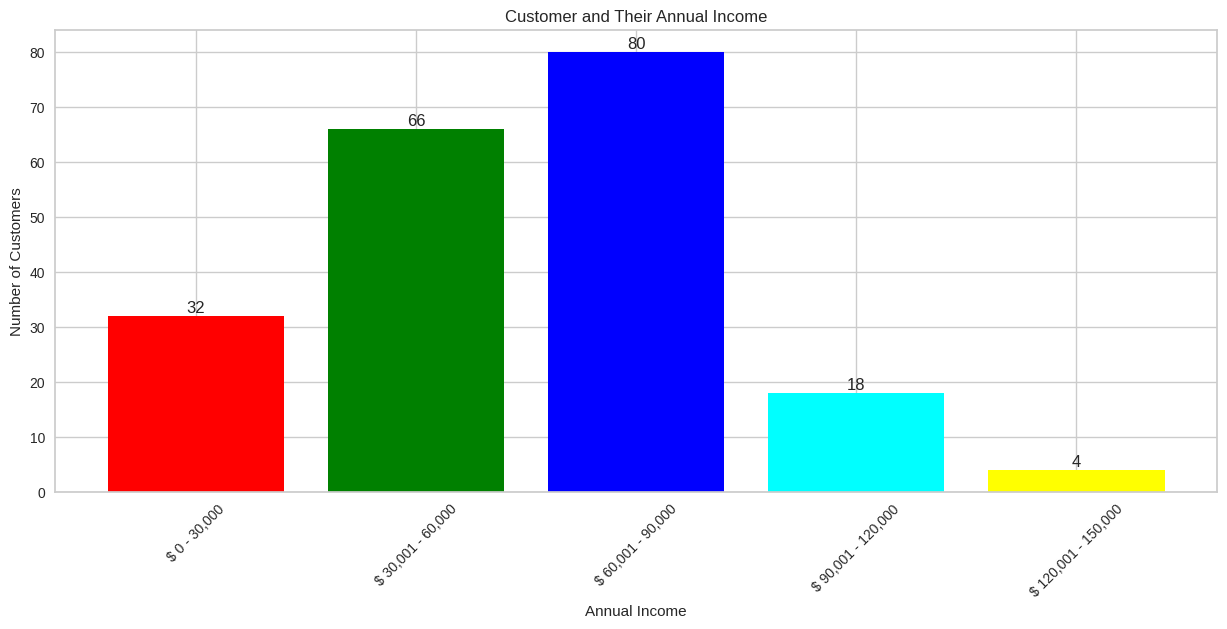

In [ ]:
ai0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ai61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ai91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
ai121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title('Customer and Their Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

for i in range(len(aix)):
    plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')

plt.show()

# Data Splitting

In [ ]:
X = df.iloc[:, [3, 4]].values

print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


### Elbow Method (determine the number of cluster)

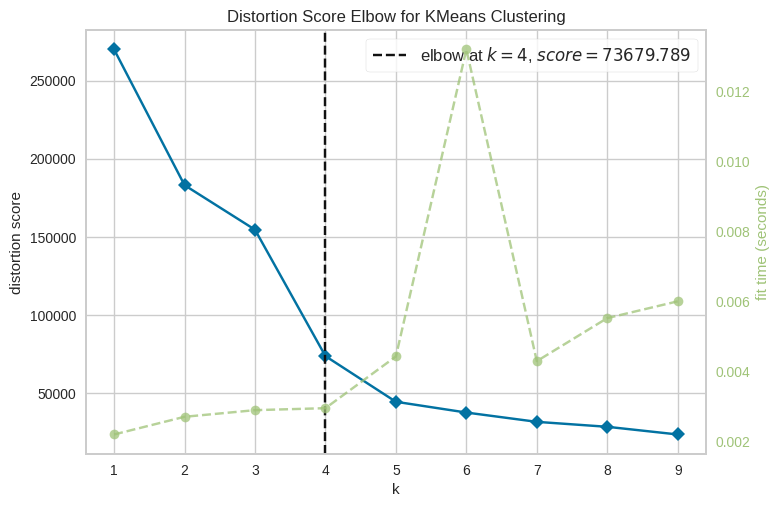

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(X)

visualizer.show()

# Cluster Modeling

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

labels = kmeans.labels_

k = 4

# fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_income = cluster_data[:, 0].mean()
        mean_spending = cluster_data[:, 1].mean()

        print(f"\nCluster {cluster_id + 1}")
        print(f"Rata-rata Annual Income ($k): {mean_income:.2f}")
        print(f"Rata-rata Spending Scor (1-100): {mean_spending:.2f}")

# analisis karakteristik cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1
Rata-rata Annual Income ($k): 48.26
Rata-rata Spending Scor (1-100): 56.48

Cluster 2
Rata-rata Annual Income ($k): 86.54
Rata-rata Spending Scor (1-100): 82.13

Cluster 3
Rata-rata Annual Income ($k): 87.00
Rata-rata Spending Scor (1-100): 18.63

Cluster 4
Rata-rata Annual Income ($k): 26.30
Rata-rata Spending Scor (1-100): 20.91


### Clustering Result visualization

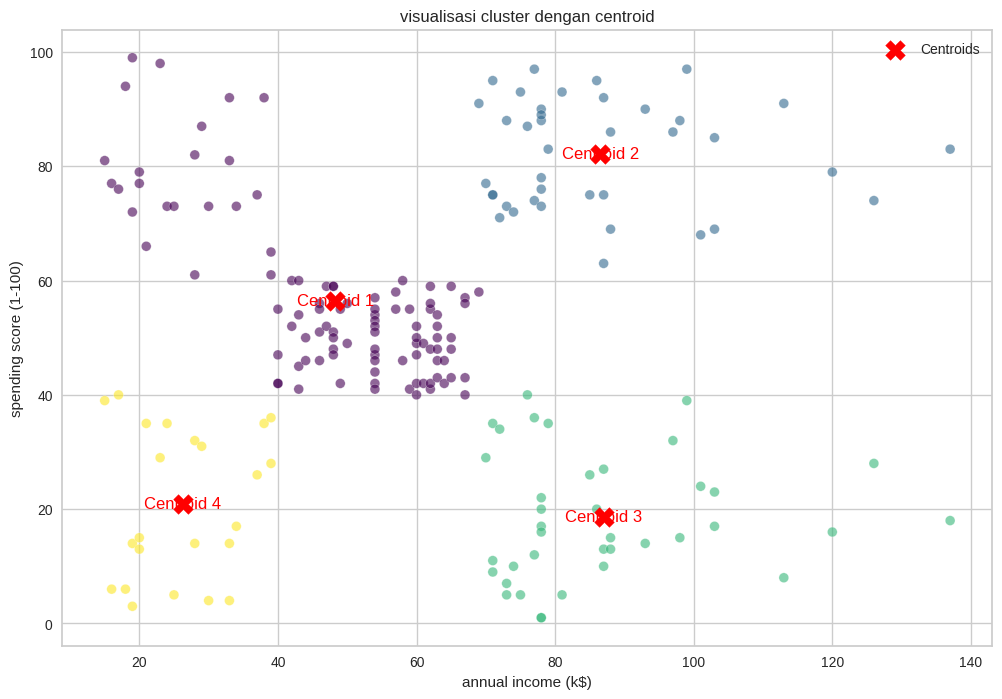

Nilai centroids:
Centroid 1: Annual Income = 48.26, Spending Score = 56.48
Centroid 2: Annual Income = 86.54, Spending Score = 82.13
Centroid 3: Annual Income = 87.00, Spending Score = 18.63
Centroid 4: Annual Income = 26.30, Spending Score = 20.91


In [ ]:
import matplotlib.pyplot as plt

# menentukan posisi centroid
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))

# plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

# plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', c='red', s=200, label='Centroids')

# menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('visualisasi cluster dengan centroid')
plt.xlabel('annual income (k$)')
plt.ylabel('spending score (1-100)')
plt.legend()
plt.show()

# menampilkan nilai centroid
print("Nilai centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Annual Income = {centroid[0]:.2f}, Spending Score = {centroid[1]:.2f}")

# Counts of Customer in each cluster

In [ ]:
cluster_counts = pd.Series(labels).value_counts().sort_index()

print("Jumlah orang di setiap cluster:")
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id + 1}: {count} orang")

Jumlah orang di setiap cluster:
Cluster 1: 100 orang
Cluster 2: 39 orang
Cluster 3: 38 orang
Cluster 4: 23 orang


# Age avg in each cluster

In [ ]:
# Menambahkan label cluster ke DataFrame asli
df_clustered = df.copy()
df_clustered['Cluster'] = labels

# Menghitung rata-rata umur per cluster
avg_age_per_cluster = df_clustered.groupby('Cluster')['Age'].mean()

print("Rata-rata umur di setiap cluster:")
for cluster_id, avg_age in avg_age_per_cluster.items():
    print(f"Cluster {cluster_id + 1}: {avg_age:.2f}")

Rata-rata umur di setiap cluster:
Cluster 1: 39.20
Cluster 2: 32.69
Cluster 3: 40.39
Cluster 4: 45.22


# Gender Mode of each cluster

In [ ]:
# Menghitung modus gender per cluster
gender_mode_per_cluster = df_clustered.groupby('Cluster')['Gender'].agg(lambda x: x.mode()[0])

print("Modus gender di setiap cluster:")
for cluster_id, gender_mode in gender_mode_per_cluster.items():
    print(f"Cluster {cluster_id + 1}: {gender_mode}")

Modus gender di setiap cluster:
Cluster 1: Female
Cluster 2: Female
Cluster 3: Male
Cluster 4: Female


### Contoh method elbow

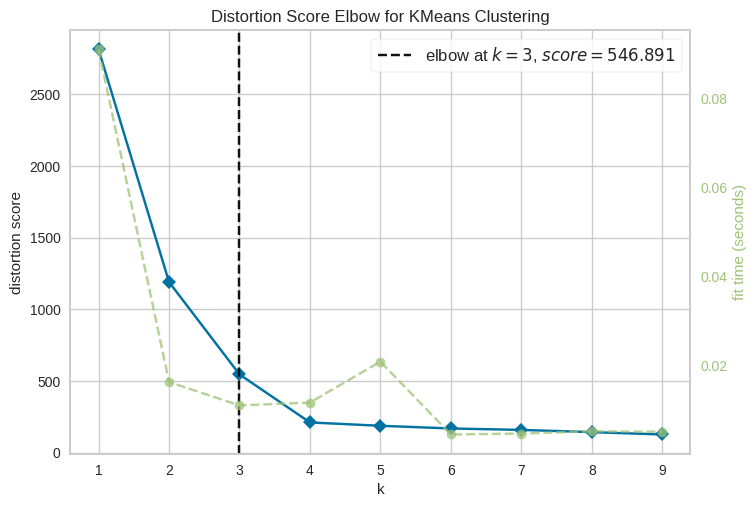

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.datasets import make_blobs

# Membuat dataset buatan
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()